# 微分をPythonで理解する
---

### [復習] そもそも微分とは何か？  
変数の微小(無限小)な変化に対する、関数の変化の大きさを調べる操作
⇒ <b>わけわからん！</b>

#### 具体例で考える  
次のような関数を例にして考える  
## $$ f(x) = x^3 $$


この関数はPythonで書くと、次のようになる

In [1]:
def f(x):
    return x**3

In [2]:
print(f(1))
print(f(2))
print(f(-3))

1
8
-27


In [3]:
# あるいは、次のようにlambda式を使っても書ける
f = lambda x : x**3

print(f(2))

8


この関数のグラフをMatplotlibを使って描写できる

In [4]:
import numpy as np                     # Numpyインポート
import matplotlib.pyplot as plt        # Matplotlibインポート
%matplotlib inline

def drawf(n):
    """ 0～nまでの区間上の関数fのグラフを描く関数を定義する ＆ 0.1ごとに点を打つ """
    y = [f(x) for x in np.arange(0, n, 0.1)]
    plt.plot(list(np.arange(0, n, 0.1)),y,'o-')
    plt.grid()

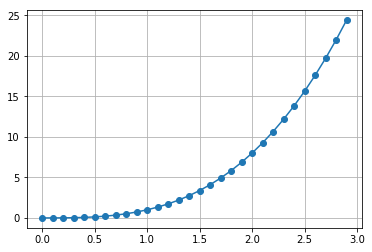

In [5]:
drawf(3)

複雑な関数の任意の点の接線をプログラミングで引くことを考える  
正確には近似接線  

目的の点aと、適当な点bの2点を通る直線を引いてみる  
簡単に引ける  
欲しい値とは全然ちがう  

In [6]:
def makeline(a, b, r=[0, 3]):
    """ 2点 a, b を通る線分を引く関数を定義する ＆ その直線の勾配を出力する """
    m = (a[1] - b[1]) / (a[0] - b[0])
    n = -((a[1] - b[1]) / (a[0] - b[0])) * a[0] + a[1]
    y = [m*x + n for x in r]
    plt.plot(r,y)
    print(m)

7.0


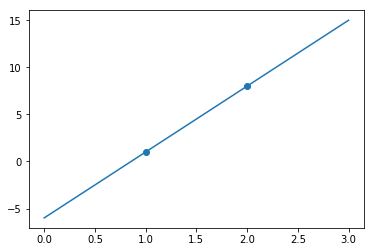

In [17]:
a=[2,8]
b=[1,1]
makeline(a, b)
plt.scatter([a[0],b[0]], [a[1], b[1]])

f(x)上の 2点a,bを決めて、直線を引いてみる  

4.0


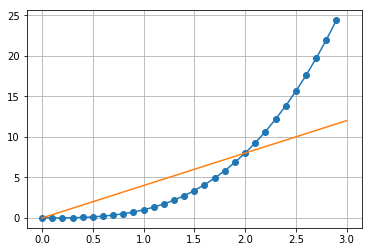

In [20]:
a = lambda x: [x, f(x)]  # f(x)のグラフ上に点aを打つ関数を定義する
b = lambda x: [x, f(x)]  # f(x)のグラフ上に点bを打つ関数を定義する
drawf(3)
makeline(a(2), b(0))

点bをだんだん点aに近づけていって直線がどうなるか眺める  

12.0


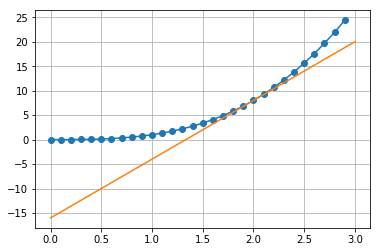

In [32]:
drawf(3)
makeline(a(2), b(1.999999999999999))

18.749977795541344


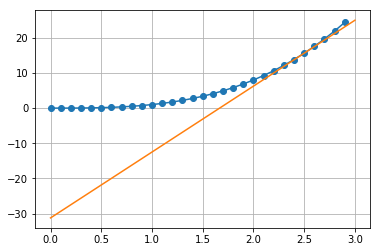

In [35]:
# 違う点の勾配も簡単にわかる
drawf(3)
makeline(a(2.5), b(2.49999999999))

12.0
18.749977795541344


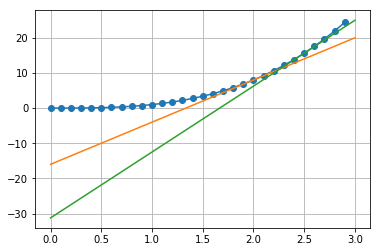

In [36]:
drawf(3)
makeline(a(2), b(1.999999999999999))
makeline(a(2.5), b(2.49999999999))

こうやって求めた勾配の値を、点aでの微分係数という

定義と見比べてみる  

$$ "点aでの微分係数" = \lim_{b \to a} \frac{f(b)-f(a)}{b-a} $$  

数学記号をつかっているだけ  
微分を利用すると、関数の中で、どのあたりが"急勾配"になっているかを調べることができる  
